Évaluation des résultats de lemmatisation 
==================================

## Objectifs

1. Lecture des logs
2. Alignement avec types de modèles
3. Lectures des résultats

## Data acquisition

In [1]:
import glob
import copy
from pandas import DataFrame

# IMPORTANT: THIS IS HARD CODED, SUPPORT FOR ALL LEMMA FROM DEV SET

nb_words_dev_set = 40812


ModelScheme = {
    "config": "",
    "tar": "",
}
file = "./logs/single-tasks-no-vulgate.log"

def parse_lines(lines, task_prefix="## ", is_file=True):
    models = []
    tasks = []
    config = None
    current_task = None
    template = {
        "scores": {},
        "eval-time": [],
        "optimizer": "adam"
    }
    current = copy.deepcopy(template)
    for line in lines:
        if is_file and line.startswith("config_path: "):
            current["config"] = line.strip()[len("config_path: "):]
        elif is_file and line.startswith("cemb_dim: "):
            current["cemb_dim"] = line.strip()[len("cemb_dim: "):]
        elif is_file and line.startswith("cell: "):
            current["cell"] = line.strip()[len("cell: "):]
        elif is_file and line.startswith("hidden_size: "):
            current["hidden_size"] = line.strip()[len("hidden_size: "):]
        elif is_file and line.startswith("optimizer: "):
            current["optimizer"] = line.strip()[len("optimizer: "):]
        elif is_file and "Bye" in line.strip():
            models.append(current)
            current = copy.deepcopy(template)
            current_task = None
        elif line.startswith(task_prefix):
            current_task = line.strip()[len(task_prefix):]
            tasks.append(current_task)
            current["scores"][current_task] = {}
            current["task"] = current_task
        elif current_task and line.startswith("|"):  # We already have a task recorded
            cat, acc, pre, rec, sup = [x.strip() for x in line.strip().split("|") if x]
            if sup == "support" or "---" in sup:
                continue
            current["scores"][current_task][cat] = (float(acc)*100, float(pre)*100, float(rec)*100, int(sup))
        elif is_file and ".tar" in line:
            current["file"] = line.strip()[len("Saved best model to: ["):-1]
        #elif is_file and "Finished training in " in line:
        #    current["training-time"] = float(line.strip()[len("2020-04-23 23:13:33,251 : Finished training in ["):-1])
        #elif is_file and "Starting epoch" in line:
        #    current["nb-epochs"] = int(line.strip()[len("2020-04-23 20:23:00,051 : Starting epoch ["):-1])
        #elif is_file and "Evaluation time: " in line:
        #    current["eval-time"].append(
        #        float(line.strip()[len("2020-04-24 04:04:56,425 : Evaluation time: "):-len(" sec")])
        #    )
    if not is_file:
        current["file"] = f"default-{len(models)}"
        models.append(current)
    models = {
        model.get("file", "default"): model for model in models
    }
    tasks = {
        task: [model for model in models.values() if model["task"] == task]
        for task in tasks
    }
    return models, tasks

with open(file) as f:
    _, tasks = parse_lines(f)


## Reference score

In [2]:
REF_NO_NOMPRO = """#### lemma

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9734   | 0.8216    | 0.8196 | 169822  |
| known-tokens     | 0.9785   | 0.907     | 0.907  | 161674  |
| unknown-tokens   | 0.8716   | 0.7172    | 0.7153 | 8148    |
| ambiguous-tokens | 0.9292   | 0.7114    | 0.7171 | 41561   |
| unknown-targets  | 0.4775   | 0.3136    | 0.3115 | 1131    |


#### pos

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9651   | 0.8794    | 0.8669 | 169822  |
| known-tokens     | 0.9672   | 0.8808    | 0.8703 | 161674  |
| unknown-tokens   | 0.9232   | 0.6979    | 0.6511 | 8148    |
| ambiguous-tokens | 0.91     | 0.8234    | 0.784  | 52129   |


#### Gend

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.965    | 0.9166    | 0.9203 | 169822  |
| known-tokens     | 0.9673   | 0.9198    | 0.9248 | 161674  |
| unknown-tokens   | 0.9201   | 0.8673    | 0.8543 | 8148    |
| ambiguous-tokens | 0.868    | 0.8652    | 0.8747 | 34690   |


#### Numb

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9719   | 0.9705    | 0.9697 | 169822  |
| known-tokens     | 0.9731   | 0.9716    | 0.9705 | 161674  |
| unknown-tokens   | 0.9482   | 0.9224    | 0.9358 | 8148    |
| ambiguous-tokens | 0.9042   | 0.9013    | 0.8979 | 38122   |


#### Case

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9219   | 0.8811    | 0.8177 | 169822  |
| known-tokens     | 0.9244   | 0.8865    | 0.8237 | 161674  |
| unknown-tokens   | 0.8719   | 0.6896    | 0.6738 | 8148    |
| ambiguous-tokens | 0.8296   | 0.8196    | 0.7667 | 63352   |


#### Deg

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9813   | 0.9694    | 0.971  | 169822  |
| known-tokens     | 0.9832   | 0.9711    | 0.9746 | 161674  |
| unknown-tokens   | 0.9434   | 0.9345    | 0.9149 | 8148    |
| ambiguous-tokens | 0.9186   | 0.906     | 0.9258 | 27870   |


#### Mood_Tense_Voice

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9831   | 0.7845    | 0.7355 | 169822  |
| known-tokens     | 0.9868   | 0.8039    | 0.7632 | 161674  |
| unknown-tokens   | 0.91     | 0.6172    | 0.5863 | 8148    |
| ambiguous-tokens | 0.924    | 0.6879    | 0.675  | 16963   |


#### Person

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9971   | 0.9875    | 0.9772 | 169822  |
| known-tokens     | 0.9978   | 0.989     | 0.9814 | 161674  |
| unknown-tokens   | 0.9834   | 0.9762    | 0.9536 | 8148    |
| ambiguous-tokens | 0.9768   | 0.9391    | 0.9068 | 10040   |


#### Dis

|                  | accuracy | precision | recall | support |
|------------------|----------|-----------|--------|---------|
| all              | 0.9727   | 0.879     | 0.8797 | 169822  |
| known-tokens     | 0.9738   | 0.8803    | 0.8823 | 161674  |
| unknown-tokens   | 0.9519   | 0.6651    | 0.5761 | 8148    |
| ambiguous-tokens | 0.912    | 0.8603    | 0.8649 | 41821   |
""".split("\n")

ref, ref_tasks = parse_lines(REF_NO_NOMPRO, "#### ", is_file=False)

## Tabulate data

In [3]:
column = [
    "file", "task", "config",
    "optimizer", "cell", "hidden", "cemb",
    "score",
    *[
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ],
    *[
        f"rank-{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks["lemma"][0]["scores"]["lemma"]
        for score in ("acc", "prec", "rec")
    ]
]

table = []
for task, files in tasks.items():
    for model in files:
        table.append([
            model["file"],
            task,
            f'{model["optimizer"]}-{model["cell"]}-H{model["hidden_size"]}-C{model["cemb_dim"]}',
            model["optimizer"],
            model["cell"],
            model["hidden_size"],
            model["cemb_dim"],
            .0, # Future Ranking Score
            # Scores
            *[
                score
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ],
            *[
                .0
                for cat in tasks["lemma"][0]["scores"]["lemma"]
                for score in model["scores"][task].get(cat, [.0, .0, .0])[:3]
            ]
        ])
    
table = sorted(table, key=lambda x: f"{x[1]}.{x[7]*100:.2f}")  # 2 is acc, 3 amb, 5 tokens
table = [column] + table

In [4]:
# Create a table like representation
import tabulate
from IPython.display import HTML, display

display(HTML(tabulate.tabulate(table, floatfmt=":,2f", tablefmt='html')))

file,task,config,optimizer,cell,hidden,cemb,score,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec,rank-all-acc,rank-all-pre,rank-all-rec,rank-kno-tok-acc,rank-kno-tok-pre,rank-kno-tok-rec,rank-unk-tok-acc,rank-unk-tok-pre,rank-unk-tok-rec,rank-amb-tok-acc,rank-amb-tok-pre,rank-amb-tok-rec,rank-unk-tar-acc,rank-unk-tar-pre,rank-unk-tar-rec
./models/latin-upc-single-Case-Case-2021_02_23-18_07_57.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.21000000000001,91.03,86.00999999999999,94.45,91.74,86.55000000000001,89.53,75.05,73.18,87.62,87.08,82.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_23-22_00_19.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.17,89.94,87.11,94.43,90.74,87.75,89.08,69.01,69.77,87.7,85.69,83.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-02_50_30.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.5,89.99000000000001,88.56,94.75,90.75,89.31,89.52,73.26,71.48,88.2,85.89,85.42999999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-07_41_50.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.49,90.14,87.97,94.76,91.2,88.52,89.13,76.17,75.42,88.3,86.50999999999999,85.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-12_34_35.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.32000000000001,90.88000000000001,87.24,94.56,91.45,87.96000000000001,89.45,74.89,70.63000000000001,87.83,87.07000000000001,83.74000000000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-17_13_55.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.51,91.3,86.96000000000001,94.75,92.25999999999999,87.53,89.9,76.89,76.12,88.24,87.66000000000001,83.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.62,91.34,87.75,94.85,92.01,88.48,90.07,75.39,71.17,88.32,87.33999999999999,83.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-02_32_32.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.34,89.60000000000001,88.03,94.59,90.64,88.46000000000001,89.35,76.88000000000001,80.67999999999999,88.03999999999999,86.69,83.91999999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-07_00_16.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.44,89.32,88.49000000000001,94.69,90.52,89.09,89.45,75.87,75.03999999999999,88.16000000000001,86.1,84.78999999999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,0.0,94.6,91.47999999999999,87.67,94.85,92.17,88.3,89.53999999999999,74.38,70.56,88.38000000000001,87.56,84.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
with open("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Full.csv", "w") as f:
    import csv
    writer = csv.writer(f)
    writer.writerows(table)

# Attempt at ranking

In [6]:
ranks = DataFrame(
    [x[1:] for x in table[1:]],
    columns=column[1:],
    index=[x[0] for x in table[1:]]
)
needs_ranking = column[8:column.index('rank-all-acc')]
    
for task in tasks:
    ranking_subset = needs_ranking if task == "lemma" else needs_ranking[:-3]
    for col in ranking_subset:
        ranks[f"rank-{col}"] += ranks.where(ranks['task'].eq(task))[col].rank(ascending=False).fillna(0)

ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].eq("lemma")) for col in needs_ranking]) / (len(needs_ranking))).fillna(0)
ranks["score"] += (sum([ranks[f"rank-{col}"].where(ranks['task'].ne("lemma")) for col in needs_ranking]) / (len(needs_ranking)-3)).fillna(0)

ranks.to_csv("3 - Optimisation des Modeles - Entrainement comme tache unique - Models - Experiment Ranger Adams Hidden - Ranks.csv")

In [7]:
display(HTML(ranks.sort_values(["task", "score"]).to_html()))

,task,config,optimizer,cell,hidden,cemb,score,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec,rank-all-acc,rank-all-pre,rank-all-rec,rank-kno-tok-acc,rank-kno-tok-pre,rank-kno-tok-rec,rank-unk-tok-acc,rank-unk-tok-pre,rank-unk-tok-rec,rank-amb-tok-acc,rank-amb-tok-pre,rank-amb-tok-rec,rank-unk-tar-acc,rank-unk-tar-pre,rank-unk-tar-rec
./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,3.375000,94.62,91.34,87.75,94.85,92.01,88.48,90.07,75.39,71.17,88.32,87.34,83.94,0.00,0.00,0.00,1.0,2.0,5.0,1.5,3.0,4.0,1.0,5.0,7.0,2.0,3.0,6.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-11_42_36.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,3.791667,94.60,91.48,87.67,94.85,92.17,88.30,89.54,74.38,70.56,88.38,87.56,84.10,0.00,0.00,0.00,2.0,1.0,6.0,1.5,2.0,6.0,3.0,8.0,9.0,1.0,2.0,4.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-17_13_55.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,4.041667,94.51,91.30,86.96,94.75,92.26,87.53,89.90,76.89,76.12,88.24,87.66,83.56,0.00,0.00,0.00,3.0,3.0,9.0,4.5,1.0,9.0,2.0,1.0,2.0,4.0,1.0,9.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-07_41_50.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,4.500000,94.49,90.14,87.97,94.76,91.20,88.52,89.13,76.17,75.42,88.30,86.51,85.08,0.00,0.00,0.00,5.0,6.0,4.0,3.0,6.0,3.0,9.0,3.0,3.0,3.0,7.0,2.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-02_50_30.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,4.958333,94.50,89.99,88.56,94.75,90.75,89.31,89.52,73.26,71.48,88.20,85.89,85.43,0.00,0.00,0.00,4.0,7.0,1.0,4.5,7.0,1.0,5.0,9.0,6.0,5.0,9.0,1.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-07_00_16.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,5.625000,94.44,89.32,88.49,94.69,90.52,89.09,89.45,75.87,75.04,88.16,86.10,84.79,0.00,0.00,0.00,6.0,10.0,2.0,6.0,10.0,2.0,6.5,4.0,4.0,6.0,8.0,3.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_25-02_32_32.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,5.916667,94.34,89.60,88.03,94.59,90.64,88.46,89.35,76.88,80.68,88.04,86.69,83.92,0.00,0.00,0.00,7.0,9.0,3.0,7.0,9.0,5.0,8.0,2.0,1.0,7.0,6.0,7.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_24-12_34_35.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,6.875000,94.32,90.88,87.24,94.56,91.45,87.96,89.45,74.89,70.63,87.83,87.07,83.74,0.00,0.00,0.00,8.0,5.0,7.0,8.0,5.0,7.0,6.5,7.0,8.0,8.0,5.0,8.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_23-18_07_57.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,7.083333,94.21,91.03,86.01,94.45,91.74,86.55,89.53,75.05,73.18,87.62,87.08,82.33,0.00,0.00,0.00,9.0,4.0,10.0,9.0,4.0,10.0,4.0,6.0,5.0,10.0,4.0,10.0,0.0,0.0,0.0
./models/latin-upc-single-Case-Case-2021_02_23-22_00_19.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,8.833333,94.17,89.94,87.11,94.43,90.74,87.75,89.08,69.01,69.77,87.70,85.69,83.95,0.00,0.00,0.00,10.0,8.0,8.0,10.0,8.0,8.0,10.0,10.0,10.0,9.0,10.0,5.0,0.0,0.0,0.0


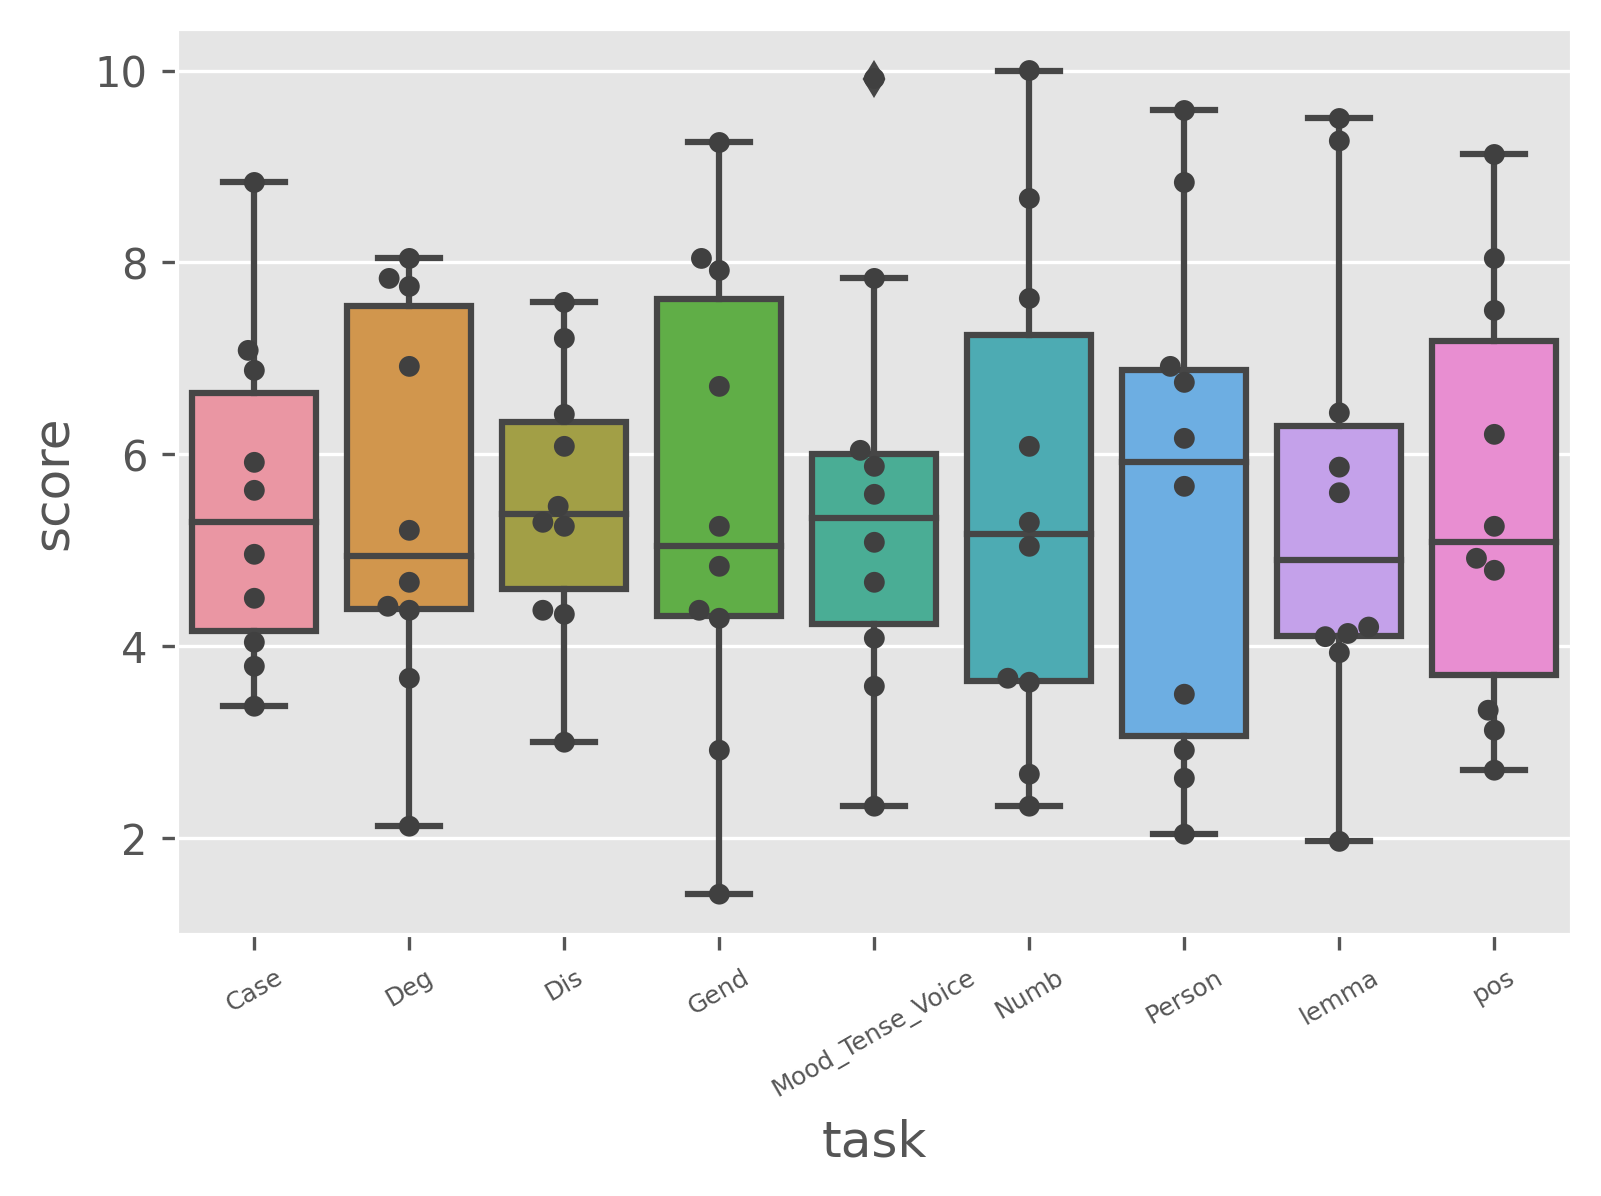

In [19]:
import seaborn as sns


ax = sns.boxplot(y="score", x="task", data=ranks.sort_values("task"))
ax = sns.swarmplot(y="score", x="task", data=ranks.sort_values("task"), color=".25")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.figure.set_dpi(300)

# Evaluating against current best-model

In [9]:
ref_score = {
    task: tuple([
            score
            for cat in model["scores"][task]
            for score in model["scores"][task][cat][:3]
        ]
    )
    for model in ref.values()
    for task in model["scores"]
}

In [10]:
for task in tasks:
    need_diff = column[8:column.index('rank-all-acc')]
    need_diff = need_diff if task == "lemma" else need_diff[:-3]
    
    cols = [
        f"{'-'.join([x[:3] for x in cat.split('-')])}-{score[:3]}"
        for cat in tasks[task][0]["scores"][task]
        for score in ("acc", "prec", "rec")
    ]
    for cat, r in zip(cols, ref_score[task]):
        if f"diff-{cat}" not in ranks.columns:
            ranks[f"diff-{cat}"] = 0
        ranks[f"diff-{cat}"] += (ranks[cat].where(ranks['task'].eq(task)) - r).fillna(0)

# Evaluating (un)stability

<ipython-input-11-dc8950b07c54>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


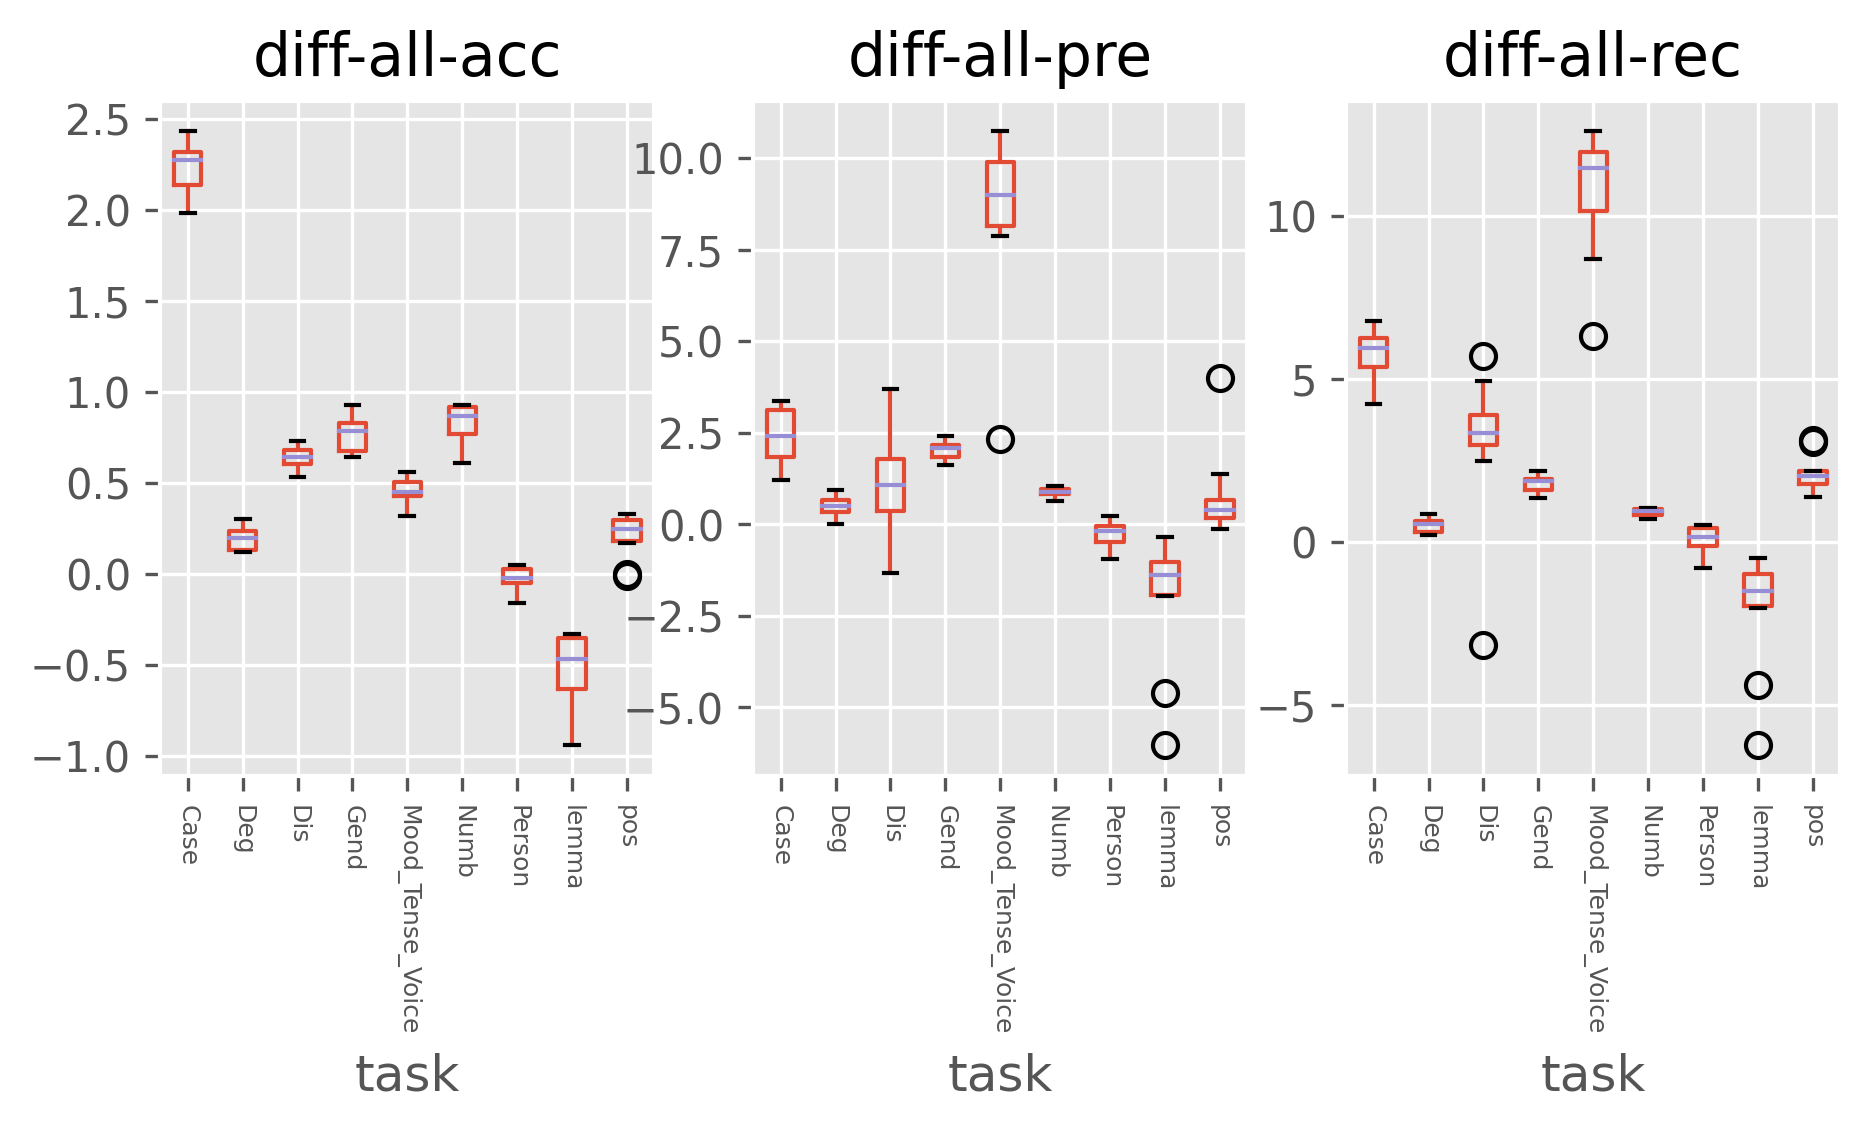

In [11]:
import matplotlib.pyplot as plt    

plt.style.use('ggplot')
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7,3), dpi=300)#, sharey=True)
ranks.boxplot(column="diff-all-acc", by="task", ax=ax1, vert=True, rot=-90)
ranks.boxplot(column="diff-all-pre", by="task", ax=ax2, vert=True, rot=-90)
ranks.boxplot(column="diff-all-rec", by="task", ax=ax3, vert=True, rot=-90)
fig.suptitle("")
fig.show()

<ipython-input-12-7ea1968d5674>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


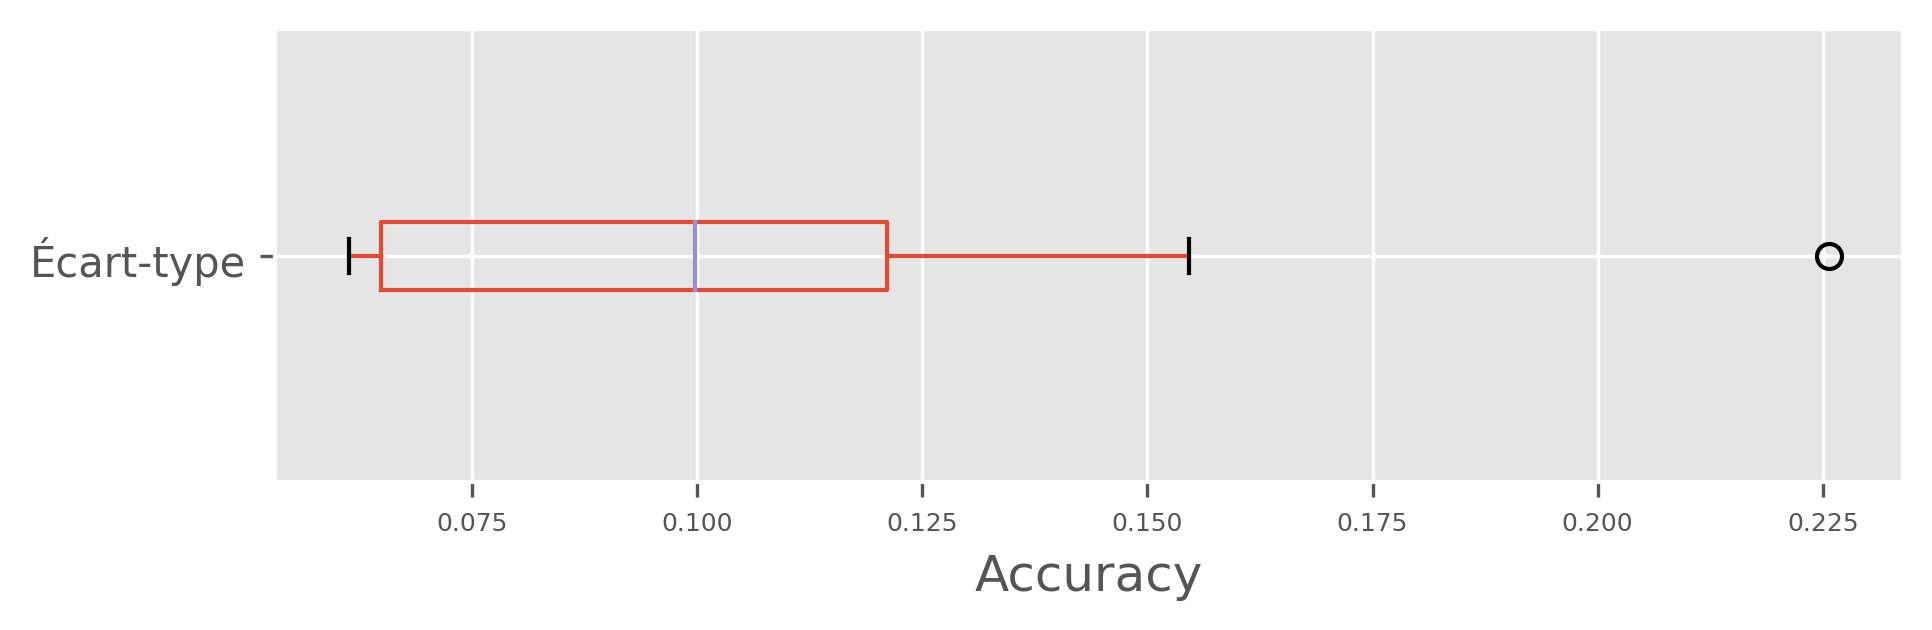

In [12]:
from pandas import Series

fig = plt.figure(figsize=(7,2), dpi=300)
ax = fig.gca()
serie = Series((ranks.groupby("task")["all-acc"].std()).tolist(), name="Écart-type")
ax = serie.plot.box(ax=ax, vert=False)#*100
ax.set_xlabel("Accuracy")
fig.show()

# Keeping the best model only

In [13]:
bests = ranks.copy().sort_values("score").drop_duplicates("task")

In [14]:
display(HTML(
    bests
        .sort_values("task")
        .to_html()
))

for index, values in bests.iterrows():
    print(f"mv {index} bests/upc/{values['task']}.tar")

,task,config,optimizer,cell,hidden,cemb,score,all-acc,all-pre,all-rec,kno-tok-acc,kno-tok-pre,kno-tok-rec,unk-tok-acc,unk-tok-pre,unk-tok-rec,amb-tok-acc,amb-tok-pre,amb-tok-rec,unk-tar-acc,unk-tar-pre,unk-tar-rec,rank-all-acc,rank-all-pre,rank-all-rec,rank-kno-tok-acc,rank-kno-tok-pre,rank-kno-tok-rec,rank-unk-tok-acc,rank-unk-tok-pre,rank-unk-tok-rec,rank-amb-tok-acc,rank-amb-tok-pre,rank-amb-tok-rec,rank-unk-tar-acc,rank-unk-tar-pre,rank-unk-tar-rec,diff-all-acc,diff-all-pre,diff-all-rec,diff-kno-tok-acc,diff-kno-tok-pre,diff-kno-tok-rec,diff-unk-tok-acc,diff-unk-tok-pre,diff-unk-tok-rec,diff-amb-tok-acc,diff-amb-tok-pre,diff-amb-tok-rec,diff-unk-tar-acc,diff-unk-tar-pre,diff-unk-tar-rec
./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar,Case,Adam-LSTM-H300-C150,Adam,LSTM,300,150,3.375000,94.62,91.34,87.75,94.85,92.01,88.48,90.07,75.39,71.17,88.32,87.34,83.94,0.00,0.00,0.00,1.0,2.0,5.0,1.5,3.0,4.0,1.0,5.0,7.0,2.0,3.0,6.0,0.0,0.0,0.0,2.43,3.23,5.98,2.41,3.36,6.11,2.88,6.43,3.79,5.36,5.38,7.27,0.00,0.00,0.00
./models/latin-upc-single-Deg-Deg-2021_02_24-08_09_38.tar,Deg,Adam-LSTM-H300-C150,Adam,LSTM,300,150,2.125000,98.43,97.70,97.77,98.62,97.85,98.04,94.83,94.52,93.22,93.27,92.87,94.01,0.00,0.00,0.00,1.0,2.0,2.0,1.0,2.0,4.5,1.0,1.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0,0.30,0.76,0.67,0.30,0.74,0.58,0.49,1.07,1.73,1.41,2.27,1.43,0.00,0.00,0.00
./models/latin-upc-single-Dis-Dis-2021_02_24-18_11_34.tar,Dis,Adam-LSTM-H300-C150,Adam,LSTM,300,150,3.000000,98.00,91.59,90.91,98.05,91.69,91.03,96.91,69.41,68.83,92.97,90.14,89.31,0.00,0.00,0.00,1.0,1.0,8.0,1.0,1.0,8.0,1.0,4.0,1.0,1.0,1.0,8.0,0.0,0.0,0.0,0.73,3.69,2.94,0.67,3.66,2.80,1.72,2.90,11.22,1.77,4.11,2.82,0.00,0.00,0.00
./models/latin-upc-single-Gend-Gend-2021_02_25-13_00_36.tar,Gend,Adam-LSTM-H300-C150,Adam,LSTM,300,150,1.416667,97.43,93.96,94.22,97.63,94.23,94.62,93.42,89.82,88.53,90.40,90.21,90.64,0.00,0.00,0.00,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,0.0,0.0,0.0,0.93,2.30,2.19,0.90,2.25,2.14,1.41,3.09,3.10,3.60,3.69,3.17,0.00,0.00,0.00
./models/latin-upc-single-Mood_Tense_Voice-Mood_Tense_Voice-2021_02_25-14_48_35.tar,Mood_Tense_Voice,Adam-LSTM-H300-C150,Adam,LSTM,300,150,2.333333,98.84,89.18,86.15,99.04,89.55,87.23,94.82,83.22,83.83,93.38,78.44,78.45,0.00,0.00,0.00,2.0,1.0,1.0,2.0,1.0,5.0,3.0,1.0,1.0,2.0,5.0,4.0,0.0,0.0,0.0,0.53,10.73,12.60,0.36,9.16,10.91,3.82,21.50,25.20,0.98,9.65,10.95,0.00,0.00,0.00
./models/latin-upc-single-Numb-Numb-2021_02_24-16_08_00.tar,Numb,Adam-LSTM-H300-C150,Adam,LSTM,300,150,2.333333,98.11,98.00,98.02,98.25,98.14,98.15,95.36,93.12,94.33,93.66,93.43,93.41,0.00,0.00,0.00,2.5,4.0,1.0,2.0,4.0,1.5,2.0,4.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.92,0.95,1.05,0.94,0.98,1.10,0.54,0.88,0.75,3.24,3.30,3.62,0.00,0.00,0.00
./models/latin-upc-single-Person-Person-2021_02_24-11_29_26.tar,Person,Adam-LSTM-H300-C150,Adam,LSTM,300,150,2.041667,99.76,98.99,98.22,99.84,99.16,98.89,98.09,97.60,94.51,98.29,95.16,94.70,0.00,0.00,0.00,1.0,1.5,3.0,1.0,1.0,1.0,4.0,3.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.05,0.24,0.50,0.06,0.26,0.75,-0.25,-0.02,-0.85,0.61,1.25,4.02,0.00,0.00,0.00
./models/latin-upc-single-lemma-complexe-lemma-2021_02_24-15_06_46.tar,lemma,Adam-LSTM-H122-C256,Adam,LSTM,122,256,1.966667,97.01,81.82,81.45,97.48,88.58,88.69,87.60,73.37,72.74,91.83,65.95,67.62,62.33,45.72,45.46,1.0,1.0,1.0,4.0,3.5,4.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,-0.33,-0.34,-0.51,-0.37,-2.12,-2.01,0.44,1.65,1.21,-1.09,-5.19,-4.09,14.58,14.36,14.31
./models/latin-upc-single-pos-pos-2021_02_25-16_06_35.tar,pos,Adam-LSTM-H300-C150,Adam,LSTM,300,150,2.708333,96.81,91.94,89.75,97.07,92.50,89.86,91.48,69.95,70.32,92.20,87.34,85.52,0.00,0.00,0.00,2.5,1.0,2.0,3.0,1.0,2.0,4.0,3.0,7.0,4.0,1.0,2.0,0.0,0.0,0.0,0.30,4.00,3.06,0.35,4.42,2.83,-0.84,0.16,5.21,1.20,5.00,7.12,0.00,0.00,0.00


mv ./models/latin-upc-single-Gend-Gend-2021_02_25-13_00_36.tar bests/upc/Gend.tar
mv ./models/latin-upc-single-lemma-complexe-lemma-2021_02_24-15_06_46.tar bests/upc/lemma.tar
mv ./models/latin-upc-single-Person-Person-2021_02_24-11_29_26.tar bests/upc/Person.tar
mv ./models/latin-upc-single-Deg-Deg-2021_02_24-08_09_38.tar bests/upc/Deg.tar
mv ./models/latin-upc-single-Numb-Numb-2021_02_24-16_08_00.tar bests/upc/Numb.tar
mv ./models/latin-upc-single-Mood_Tense_Voice-Mood_Tense_Voice-2021_02_25-14_48_35.tar bests/upc/Mood_Tense_Voice.tar
mv ./models/latin-upc-single-pos-pos-2021_02_25-16_06_35.tar bests/upc/pos.tar
mv ./models/latin-upc-single-Dis-Dis-2021_02_24-18_11_34.tar bests/upc/Dis.tar
mv ./models/latin-upc-single-Case-Case-2021_02_24-21_54_21.tar bests/upc/Case.tar


## Comparing Configurations

In [15]:
diff = bests[(col for col in ranks.columns if col.startswith("diff") or col in {"task"})].copy()

def nice_columns(matrix, cols):
    beautiful = {
        "kno-tok": "Known tokens",
        "unk-tok": "Unknown tokens",
        "amb-tok": "Ambiguous tokens",
        "unk-tar": "Unknown target",
        "all": "All"
    }
    cols1 = [
        "" 
        if "-" not in colname 
        else 
        beautiful["-".join(colname.split("-")[:-1]).replace("diff-", "").replace("rank-", "")]
        
        for colname in cols
    ]
    cols2 = [
        colname if "-" not in colname else colname.split("-")[-1]
        for colname in cols
    ]
    new = matrix[cols].copy()
    new.columns = [cols1, cols2]
    return new

diff = nice_columns(
    bests,
    [col for col in ranks.columns if col.startswith("diff") or col in {"task"}]
)
display(HTML(diff.sort_values(("", "task")).to_html(index=False)))

print("-------------------------------------------------------")
print("-------------------------------------------------------")

cols = [bests.columns[0], *bests.columns[6:19]]
normal_score = nice_columns(bests, cols)
display(HTML(normal_score.sort_values(("", "task")).to_html(index=False)))

-------------------------------------------------------
-------------------------------------------------------
